In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

## Load ahoi Logs

In [101]:
# Load the CSV data

## 2024-08-05 ==== 
# file_path = 'logs/2024-08-05_01_mobile_node/ahoi_interface_log_20240805_183434_on_dock.csv' # still on dock
# file_path = 'logs/2024-08-05_01_mobile_node/ahoi_interface_log_20240805_183728.csv' # dock and start
# file_path = 'logs/2024-08-05_01_mobile_node/ahoi_interface_log_20240805_185530_in_between_runs.csv'
# file_path = 'logs/2024-08-05_01_mobile_node/ahoi_interface_log_20240805_185612.csv'
file_path = 'logs/2024-08-05_01_mobile_node/ahoi_interface_log_20240805_190152.csv'
# file_path = 'logs/2024-08-05_01_mobile_node/ahoi_interface_log_20240805_190449_anchor_to_dock.csv'

## 2024-08-02 ==== First Trials

# file_path = 'logs/2024-08-02_01_mobile_node/ahoi_interface_log_20240802_093725.csv'
# file_path = 'logs/2024-08-02_01_mobile_node/ahoi_interface_log_20240802_095845.csv'
# file_path = 'logs/2024-08-02_01_mobile_node/ahoi_interface_log_20240802_100307_extra_mass.csv'
# file_path = 'logs/2024-08-02_01_mobile_node/ahoi_interface_log_20240802_101324.csv'
# file_path = 'logs/2024-08-02_01_mobile_node/ahoi_interface_log_20240802_101422.csv'
# file_path = 'logs/2024-08-02_01_mobile_node/ahoi_interface_log_20240802_102117.csv'
# file_path = 'logs/2024-08-02_01_mobile_node/ahoi_interface_log_20240802_102127_back to dock.csv'



### Adapt ahoi data logs

In [102]:
ahoi_df_raw = pd.read_csv(file_path)

ahoi_df_raw['timestamp'] = pd.to_datetime(ahoi_df_raw['timestamp']) + pd.to_timedelta(4, unit='h')
ahoi_df_raw['anchor_id'] = ahoi_df_raw['anchor_id'].fillna(99).astype(int)

# Create a dictionary for anchor labels
anchor_labels = {2: 'NED - 2', 6: 'ABE - 6', 9: 'MAX - 9',99: 'NA'}

# Map the 'anchor_id' to 'anchor_label'
ahoi_df_raw['anchor_label'] = ahoi_df_raw['anchor_id'].map(anchor_labels)

# Display the first few rows to ensure it's loaded correctly
ahoi_df_raw.head()

,timestamp,base_id,target_id,sequence_number,event,time,anchor_id,distance,pos_x,pos_y,anchor_label
0,2024-08-05 23:01:52.165217,3,2.0,1,range_poll,NaN,99,NaN,NaN,NaN,NA
1,2024-08-05 23:01:52.847882,3,NaN,1,TOF-ACK,682.641983,2,27.9195,NaN,NaN,NED - 2
2,2024-08-05 23:01:53.323636,3,NaN,1,POS-ACK,1158.298969,2,NaN,32.48,-63.11,NED - 2
3,2024-08-05 23:01:53.568754,3,6.0,1,range_poll,NaN,99,NaN,NaN,NaN,NA
4,2024-08-05 23:01:54.970710,3,9.0,1,range_poll,NaN,99,NaN,NaN,NaN,NA


### Load Moos Logs

In [103]:
use_moos_logs = False
if use_moos_logs:
    # mobile node
    file_mdm_oak = 'logs/2024-08-02_01_mdm/LOG_OAK_2_8_2024_____09_37_09/log_oak_2_8_2024_____09_37_09_alog_csvs/NODE_REPORT_LOCAL.csv'
    df_mdm_oak = pd.read_csv(file_mdm_oak, on_bad_lines='skip')

    # anchor node ABE - id: 6
    file_mdm_abe = 'logs/2024-08-02_01_mdm/LOG_ABE_2_8_2024_____09_37_00/log_abe_2_8_2024_____09_37_00_alog_csvs/NODE_REPORT_LOCAL.csv'
    df_mdm_abe = pd.read_csv(file_mdm_abe, on_bad_lines='skip')

    # anchor node MAX - id: 9
    file_mdm_max = 'logs/2024-08-02_01_mdm/LOG_MAX_2_8_2024_____09_37_03/log_max_2_8_2024_____09_37_03_alog_csvs/NODE_REPORT_LOCAL.csv'
    df_mdm_max = pd.read_csv(file_mdm_max, on_bad_lines='skip')

    # anchor node NED - id: 2
    file_mdm_ned = 'logs/2024-08-02_01_mdm/LOG_NED_2_8_2024_____09_37_06/log_ned_2_8_2024_____09_37_06_alog_csvs/NODE_REPORT_LOCAL.csv'
    df_mdm_ned = pd.read_csv(file_mdm_ned, on_bad_lines='skip')

    # Construct datetime objects for the start and end times


    df_mdm_oak['TIME'] = pd.to_datetime(df_mdm_oak['TIME'], unit='s')

    df_mdm_abe['TIME'] = pd.to_datetime(df_mdm_abe['TIME'], unit='s')

    df_mdm_max['TIME'] = pd.to_datetime(df_mdm_max['TIME'], unit='s')

    df_mdm_ned['TIME'] = pd.to_datetime(df_mdm_ned['TIME'], unit='s')



### Clip data frames

In [104]:
start_utc = ahoi_df_raw['timestamp'].iloc[0]
end_utc = ahoi_df_raw['timestamp'].iloc[-1]

# Manual set new start / End
#start_utc = datetime(2024, 8, 2, 14, 6, 50) 
#end_utc = datetime(2024, 8, 2, 14, 10, 10)

print(f"data start at {start_utc} UTC")
print(f"data end at {end_utc} UTC")

data start at 2024-08-05 23:01:52.165217 UTC
data end at 2024-08-05 23:04:46.738147 UTC


### Clipping

In [105]:

ahoi_df = ahoi_df_raw[(ahoi_df_raw['timestamp'] >= start_utc) & (ahoi_df_raw['timestamp'] <= end_utc)]

if use_moos_logs:

    mdm_start_time_utc = start_utc
    mdm_end_time_utc = end_utc

    filtered_df_mdm_oak = df_mdm_oak[(df_mdm_oak['TIME'] >= mdm_start_time_utc) & (df_mdm_oak['TIME'] <= mdm_end_time_utc)]

    filtered_df_mdm_abe = df_mdm_abe[(df_mdm_abe['TIME'] >= mdm_start_time_utc) & (df_mdm_abe['TIME'] <= mdm_end_time_utc)]
    filtered_df_mdm_max = df_mdm_max[(df_mdm_max['TIME'] >= mdm_start_time_utc) & (df_mdm_max['TIME'] <= mdm_end_time_utc)]
    filtered_df_mdm_ned = df_mdm_ned[(df_mdm_ned['TIME'] >= mdm_start_time_utc) & (df_mdm_ned['TIME'] <= mdm_end_time_utc)]


    # Step 1: Create a union of all time points using numpy
    common_time = np.union1d(filtered_df_mdm_oak['TIME'], filtered_df_mdm_abe['TIME'])
    common_time = np.union1d(common_time, filtered_df_mdm_max['TIME'])
    common_time = np.union1d(common_time, filtered_df_mdm_ned['TIME'])

    # Step 2: Interpolate data for Oak
    oak_interpolated = (
        filtered_df_mdm_oak.set_index('TIME')
        .reindex(common_time)
        .interpolate(method='time')
    )

    # Step 3: Interpolate and calculate distances for each robot

    # Abe
    abe_interpolated = (
        filtered_df_mdm_abe.set_index('TIME')
        .reindex(common_time)
        .interpolate(method='time')
    )

    distances_abe = np.sqrt(
        (oak_interpolated['X'] - abe_interpolated['X']) ** 2 +
        (oak_interpolated['Y'] - abe_interpolated['Y']) ** 2
    ).reset_index(name='Distance_Abe')

    # Max
    max_interpolated = (
        filtered_df_mdm_max.set_index('TIME')
        .reindex(common_time)
        .interpolate(method='time')
    )

    distances_max = np.sqrt(
        (oak_interpolated['X'] - max_interpolated['X']) ** 2 +
        (oak_interpolated['Y'] - max_interpolated['Y']) ** 2
    ).reset_index(name='Distance_Max')

    # Ned
    ned_interpolated = (
        filtered_df_mdm_ned.set_index('TIME')
        .reindex(common_time)
        .interpolate(method='time')
    )

    distances_ned = np.sqrt(
        (oak_interpolated['X'] - ned_interpolated['X']) ** 2 +
        (oak_interpolated['Y'] - ned_interpolated['Y']) ** 2
    ).reset_index(name='Distance_Ned')

    # Step 4: Combine results into a single data frame
    distances_combined = distances_abe.merge(distances_max, on='TIME').merge(distances_ned, on='TIME')



## Analyze Reception rates ToF / Pos

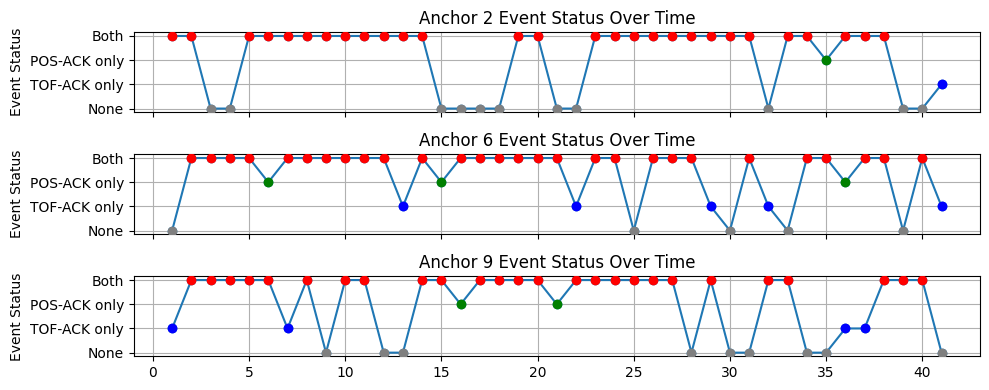

In [106]:
rec_tof_ack = ahoi_df[ahoi_df['event'] == 'TOF-ACK'][['sequence_number', 'anchor_id']]
rec_pos_ack = ahoi_df[ahoi_df['event'] == 'POS-ACK'][['sequence_number', 'anchor_id']]


# Count events per anchor
tof_counts = rec_tof_ack['anchor_id'].value_counts()
pos_counts = rec_pos_ack['anchor_id'].value_counts()

# Pivot the data to get a matrix of events
event_matrix =ahoi_df.pivot_table(index='sequence_number', columns=['anchor_id', 'event'], aggfunc='size', fill_value=0)

# Create a status column for each anchor
event_matrix['2 Status'] = event_matrix[(2, 'TOF-ACK')] + 2 * event_matrix[(2, 'POS-ACK')]
event_matrix['6 Status'] = event_matrix[(6, 'TOF-ACK')] + 2 * event_matrix[(6, 'POS-ACK')]
event_matrix['9 Status'] = event_matrix[(9, 'TOF-ACK')] + 2 * event_matrix[(9, 'POS-ACK')]



# Create a figure with subplots for each anchor and a combined plot at the bottom
fig, ax = plt.subplots(3, 1, figsize=(10, 4), sharex=True)

# Define colors for each status
colors = {
    0: 'gray',
    1: 'blue',
    2: 'green',
    3: 'red'
}

# Plot for Anchor 2
ax[0].plot(event_matrix.index, event_matrix['2 Status'], marker='o', linestyle='-')
for i, txt in enumerate(event_matrix['2 Status']):
    ax[0].scatter(event_matrix.index[i], [txt], color=colors[txt], zorder=5)
ax[0].set_title('Anchor 2 Event Status Over Time')
ax[0].set_ylabel('Event Status')
ax[0].set_yticks([0, 1, 2, 3])
ax[0].set_yticklabels(['None', 'TOF-ACK only', 'POS-ACK only', 'Both'])

# Plot for Anchor 6
ax[1].plot(event_matrix.index, event_matrix['6 Status'], marker='o', linestyle='-')
for i, txt in enumerate(event_matrix['6 Status']):
    ax[1].scatter(event_matrix.index[i], [txt], color=colors[txt], zorder=5)
ax[1].set_title('Anchor 6 Event Status Over Time')
ax[1].set_ylabel('Event Status')
ax[1].set_yticks([0, 1, 2, 3])
ax[1].set_yticklabels(['None', 'TOF-ACK only', 'POS-ACK only', 'Both'])

# Plot for Anchor 9
ax[2].plot(event_matrix.index, event_matrix['9 Status'], marker='o', linestyle='-')
for i, txt in enumerate(event_matrix['9 Status']):
    ax[2].scatter(event_matrix.index[i], [txt], color=colors[txt], zorder=5)
ax[2].set_title('Anchor 9 Event Status Over Time')
ax[2].set_ylabel('Event Status')
ax[2].set_yticks([0, 1, 2, 3])
ax[2].set_yticklabels(['None', 'TOF-ACK only', 'POS-ACK only', 'Both'])

# # Combined plot
# for anchor_id, status_column in zip([2, 6, 9], ['2 Status', '6 Status', '9 Status']):
#     ax[3].plot(event_matrix.index, event_matrix[status_column], marker='o', linestyle='-', label=f'Anchor {anchor_id}',
#                color='black')  # Using black for lines
#     for i, txt in enumerate(event_matrix[status_column]):
#         ax[3].scatter(event_matrix.index[i], [txt], color=colors[txt], zorder=5)

# # Formatting for the combined plot
# ax[3].set_title('Combined Anchor Event Status Over Time')
# ax[3].set_xlabel('Sequence Number')
# ax[3].set_ylabel('Event Status')
# ax[3].set_yticks([0, 1, 2, 3])
# ax[3].set_yticklabels(['None', 'TOF-ACK only', 'POS-ACK only', 'Both'])
# ax[3].legend(title='Anchor ID')

# Grid and layout
for a in ax:
    a.grid(True)

plt.tight_layout()
plt.show()


## Compare Ranges

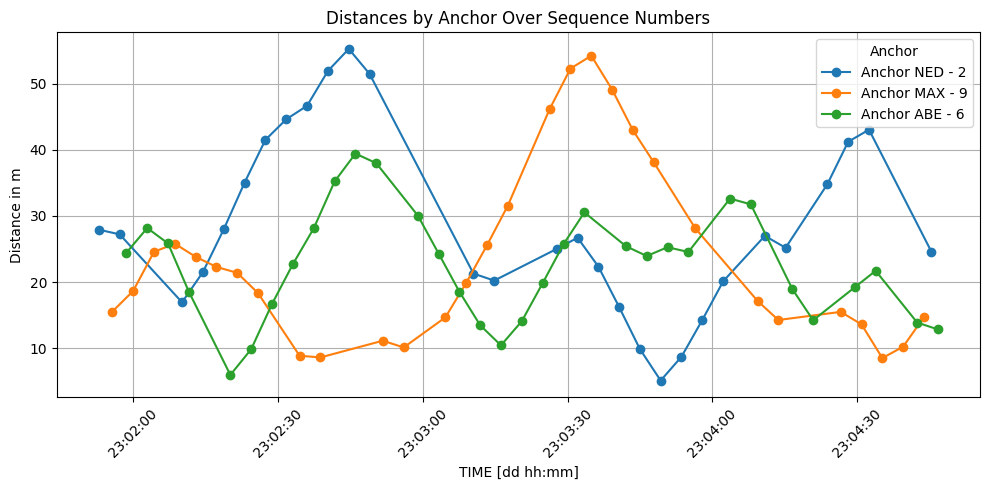

In [107]:
# Prepare data for plotting distances by anchor over sequence numbers
tof_ack_data = ahoi_df[ahoi_df['event'] == 'TOF-ACK'][['timestamp', 'anchor_id', 'distance']]

scale =  1500/ 1500

# Plot the distances by anchor over sequence numbers
plt.figure(figsize=(10, 5))
for anchor_id in tof_ack_data['anchor_id'].unique():
    anchor_data = tof_ack_data[tof_ack_data['anchor_id'] == anchor_id]
    plt.plot(anchor_data['timestamp'], anchor_data['distance']*scale, label=f'Anchor {anchor_labels[anchor_id]}', marker='o')

if use_moos_logs:
    plt.plot(distances_combined['TIME'], distances_combined['Distance_Abe'], label='Distance to Abe')
    plt.plot(distances_combined['TIME'], distances_combined['Distance_Max'], label='Distance to Max')
    plt.plot(distances_combined['TIME'], distances_combined['Distance_Ned'], label='Distance to Ned')

plt.xlabel('TIME [dd hh:mm]')
plt.ylabel('Distance in m')
plt.title('Distances by Anchor Over Sequence Numbers')
plt.legend(title="Anchor")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




## Compare Anchor Pos

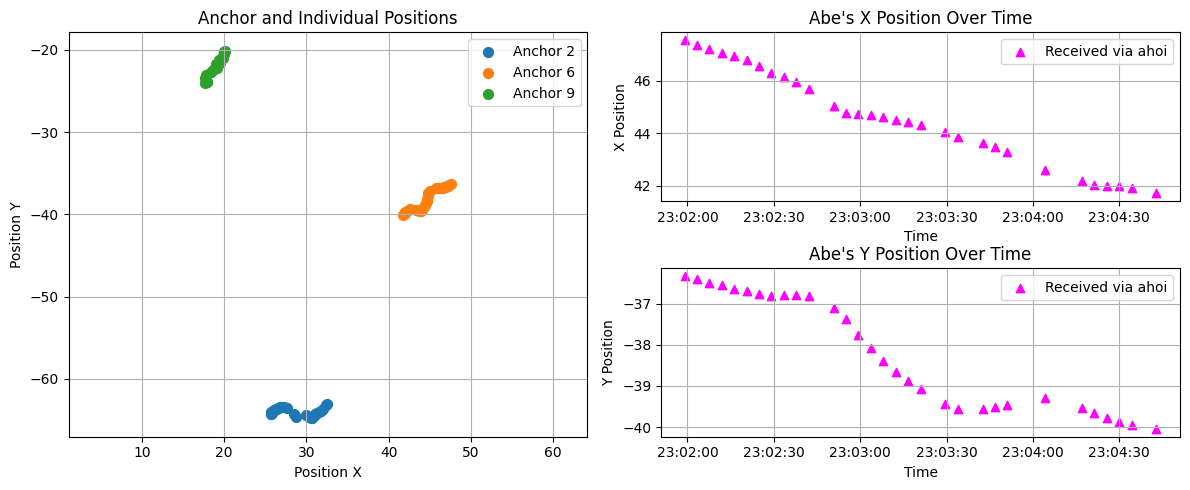

In [108]:
import matplotlib.gridspec as gridspec


# Prepare data for plotting anchor positions
pos_ack_data = ahoi_df[ahoi_df['event'] == 'POS-ACK'][['timestamp','anchor_id', 'pos_x', 'pos_y']].drop_duplicates()


# Create the plot layout using gridspec for custom layout
fig = plt.figure(figsize=(12, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# Plot the anchor positions in the left subplot
ax0 = plt.subplot(gs[0])
# Plot the anchor positions in x, y
for anchor_id in pos_ack_data['anchor_id'].unique():
    anchor_pos = pos_ack_data[pos_ack_data['anchor_id'] == anchor_id]
    ax0.scatter(anchor_pos['pos_x'], anchor_pos['pos_y'], label=f'Anchor {anchor_id}', s=50)
#ax0.scatter(pos_ack_data['pos_x'], pos_ack_data['pos_y'], label='Measured Anchors', s=50, color='orange', marker='o')


# Add data for oak, ned, abe, max
if use_moos_logs:
    ax0.scatter(filtered_df_mdm_oak['X'], filtered_df_mdm_oak['Y'], color='red', marker='x', label='Oak', s=100)
    ax0.scatter(filtered_df_mdm_ned['X'], filtered_df_mdm_ned['Y'], color='green', marker='o', label='Ned', s=5)
    ax0.scatter(filtered_df_mdm_abe['X'], filtered_df_mdm_abe['Y'], color='blue', marker='^', label='Abe', s=5)
    ax0.scatter(filtered_df_mdm_max['X'], filtered_df_mdm_max['Y'], color='purple', marker='s', label='Max', s=5)

ax0.set_xlabel('Position X')
ax0.set_ylabel('Position Y')
ax0.set_title('Anchor and Individual Positions')
ax0.legend()
ax0.axis('equal')
ax0.grid(True)

# Create subplots for Abe's X and Y over time stacked on the right
gs_right = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1], hspace=0.4)


anchor_df = pos_ack_data[pos_ack_data['anchor_id'] == 6][['timestamp', 'pos_x', 'pos_y']]

# Plot Abe's X position over time in the first subplot on the right
ax1 = plt.subplot(gs_right[0])
if use_moos_logs:
    ax1.plot(filtered_df_mdm_abe['TIME'], filtered_df_mdm_abe['X'], linestyle='--',  color='blue', label='Abe X')
ax1.scatter(anchor_df['timestamp'], anchor_df['pos_x'], marker='^', color='magenta',label='Received via ahoi')
ax1.set_xlabel('Time')
ax1.set_ylabel('X Position')
ax1.set_title("Abe's X Position Over Time")
ax1.legend()
ax1.grid(True)

# Plot Abe's Y position over time in the second subplot on the right
ax2 = plt.subplot(gs_right[1])
if use_moos_logs:
    ax2.plot(filtered_df_mdm_abe['TIME'], filtered_df_mdm_abe['Y'], linestyle='--',  color='blue', label='Abe Y')
ax2.scatter(anchor_df['timestamp'], anchor_df['pos_y'], marker='^', color='magenta',label='Received via ahoi')
ax2.set_xlabel('Time')
ax2.set_ylabel('Y Position')
ax2.set_title("Abe's Y Position Over Time")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## EKF

### EKF-Init

In [109]:
import ahoi_ekf_base

# Initializing EKF parameters
auv_dim_state = 3
ahoi_dim_meas = 1
x0_est = np.array([30, -10, 1])
p_mat_est = np.diag([15, 15, 0.0])

process_noise_mat = np.diag([3, 3, 0.0])
meas_noise_val = 1

### EKF-Run

In [110]:
# TODO: EKF with ground truth distances
# TODO: load one file / df with all measurement data
# TODO: update also for range measurements - how old do we allow positions to be?
# TODO: change from sequences to time updates


# Create an instance of the EKF
ahoi_ekf = ahoi_ekf_base.EKF_Node(auv_dim_state, ahoi_dim_meas,
                                  meas_noise_val, process_noise_mat,
                                  x0_est, p_mat_est)



# List to store estimated positions
x_est_list = []

# Dictionary to store all dynamic anchor positions over sequences by anchor ID
dynamic_anchor_positions = {2: [], 6: [], 9: []}

# Color mapping for specific anchor IDs
anchor_colors = {2: 'r', 6: 'g', 9: 'orange'}

# Iterate over each sequence number
sequence_numbers = ahoi_df['sequence_number'].unique()


#print(sequence_numbers)

for seq_i in sequence_numbers:
    # Predict the next state
    ahoi_ekf.predict(dt_sim=1)

    # Store the predicted position
    x_est_list.append(ahoi_ekf.get_x_est().copy())

    # Filter the DataFrame for the current sequence number
    seq_measurements = ahoi_df[ahoi_df['sequence_number'] == seq_i][['anchor_id', 'event', 'pos_x', 'pos_y', 'distance']]
    
    # Get unique anchor IDs
    anchor_ids = seq_measurements['anchor_id'].dropna().unique()
    #print(f"seq id {seq_i}")
    # Iterate over each unique anchor ID
    for id in anchor_ids:
        # Filter the DataFrame for the current anchor ID
        anchor_meas_data = seq_measurements[seq_measurements['anchor_id'] == id][['event', 'pos_x', 'pos_y', 'distance']]
        
        # Count the number of rows for each event type
        tof_ack_count = len(anchor_meas_data[anchor_meas_data['event'] == 'TOF-ACK'])
        pos_ack_count = len(anchor_meas_data[anchor_meas_data['event'] == 'POS-ACK'])
        
        if (tof_ack_count + pos_ack_count) == 2:
            #print(f"update anchor {id}")
            # Extract position and distance measurements
            anchor_pos = anchor_meas_data[anchor_meas_data['event'] == 'POS-ACK'][['pos_x', 'pos_y']].to_numpy()
            anchor_pos3d = np.zeros((3,))
            anchor_pos3d[0:2] = anchor_pos[0]
            dist_meas = anchor_meas_data[anchor_meas_data['event'] == 'TOF-ACK'][['distance']].to_numpy()

            # Store the anchor position in the dictionary
            if id in dynamic_anchor_positions:
                dynamic_anchor_positions[id].append(anchor_pos3d.copy())

            # Perform measurement update
            ahoi_ekf.measurement_update(dist_meas=dist_meas[0], anchor_pos=anchor_pos3d, w_mat_dist=meas_noise_val)

# Convert the list of estimated positions to a NumPy array
x_est_array = np.array(x_est_list)

## EKF-Plotting

/tmp/ipykernel_5080/2600904766.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()
/tmp/ipykernel_5080/2600904766.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


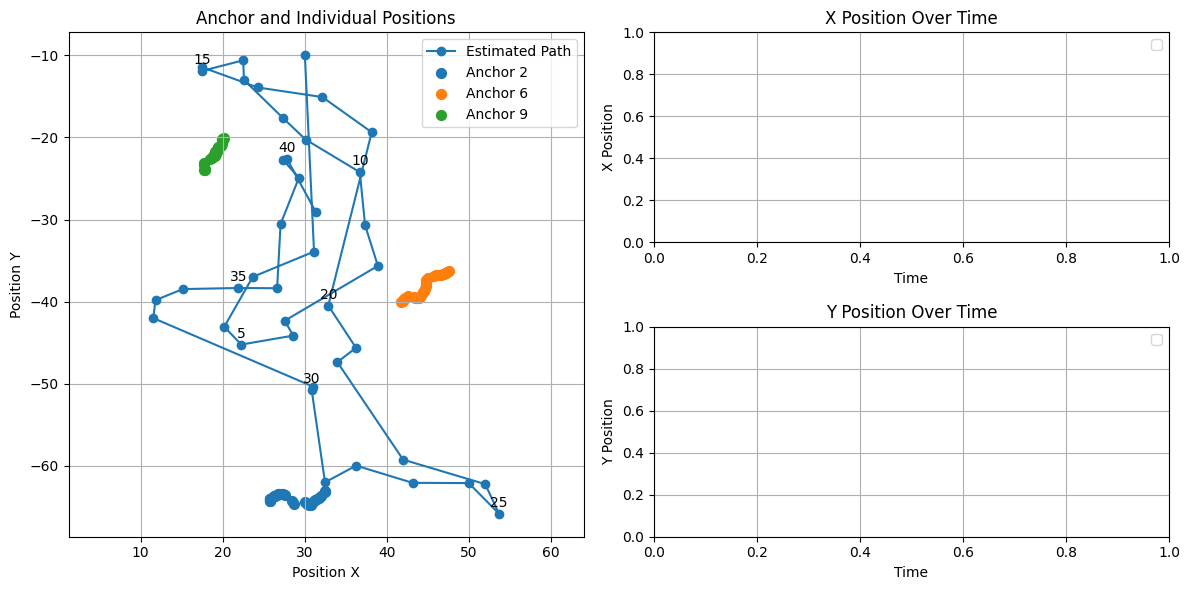

In [111]:
# Create the plot layout using gridspec for custom layout
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

# Plot the anchor positions in the left subplot
ax0 = plt.subplot(gs[0])

# Plot the estimated path
ax0.plot(x_est_array[:, 0], x_est_array[:, 1], label='Estimated Path', marker='o', linestyle='-')

# Annotate the estimated path with sequence numbers for every 5th sequence
n_label = 5
for idx, (x, y) in enumerate(zip(x_est_array[:, 0], x_est_array[:, 1])):
    if sequence_numbers[idx] % n_label == 0:
        ax0.annotate(str(sequence_numbers[idx]), (x, y), textcoords="offset points", xytext=(0, 5), ha='center')

if use_moos_logs:
    ax0.plot(filtered_df_mdm_oak['X'], filtered_df_mdm_oak['Y'], color='red', linestyle='-', label='Oak')


# Plot the anchor positions in x, y
for anchor_id in pos_ack_data['anchor_id'].unique():
    anchor_pos = pos_ack_data[pos_ack_data['anchor_id'] == anchor_id]
    ax0.scatter(anchor_pos['pos_x'], anchor_pos['pos_y'], label=f'Anchor {anchor_id}', s=50)

ax0.set_xlabel('Position X')
ax0.set_ylabel('Position Y')
ax0.set_title('Anchor and Individual Positions')
ax0.legend()
ax0.axis('equal')
ax0.grid(True)

# Create subplots for Abe's X and Y over time stacked on the right
gs_right = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=gs[1], hspace=0.4)


anchor_df = pos_ack_data[pos_ack_data['anchor_id'] == 6][['timestamp', 'pos_x', 'pos_y']]

# Plot Abe's X position over time in the first subplot on the right
ax1 = plt.subplot(gs_right[0])
if use_moos_logs:
    ax1.plot(filtered_df_mdm_oak['TIME'], filtered_df_mdm_oak['X'], linestyle='--',  color='green', label='Oak X')
#ax1.scatter(anchor_df['timestamp'], anchor_df['pos_x'], marker='^',label='Received via ahoi')
ax1.set_xlabel('Time')
ax1.set_ylabel('X Position')
ax1.set_title("X Position Over Time")
ax1.legend()
ax1.grid(True)

# Plot Abe's Y position over time in the second subplot on the right
ax2 = plt.subplot(gs_right[1])
if use_moos_logs:
    ax2.plot(filtered_df_mdm_oak['TIME'], filtered_df_mdm_oak['Y'], linestyle='--',  color='green', label='Oak Y')
#ax2.scatter(anchor_df['timestamp'], anchor_df['pos_y'], marker='^', label='Received via ahoi')
ax2.set_xlabel('Time')
ax2.set_ylabel('Y Position')
ax2.set_title("Y Position Over Time")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()